In [13]:
#menginstal library yang diperlukan jika belum tersedia di Colab
!pip install opencv-python-headless


In [14]:
#mengimpor semua library yang diperlukan
import cv2
import numpy as np
import requests
from io import BytesIO
from matplotlib import pyplot as plt

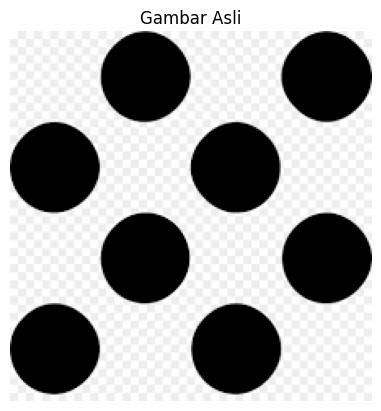

In [15]:
# Ganti dengan URL gambar yang ingin Anda proses
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2WKDu4GMdGO9ia1HA60iZIN9nwCXkdl8ZI4FQm-RYwxYNLOaE"

# Mendownload gambar dari URL
response = requests.get(image_url)
image_bytes = BytesIO(response.content)
image = cv2.imdecode(np.frombuffer(image_bytes.read(), np.uint8), cv2.IMREAD_COLOR)

# Menampilkan gambar asli
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')
plt.show()



In [16]:
# Konversi gambar ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding untuk memisahkan objek dari background
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)


In [17]:
# Mencari kontur pada gambar
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Menghitung jumlah objek
num_objects = len(contours)
print("Jumlah objek berwarna hitam dalam gambar:", num_objects)


Jumlah objek berwarna hitam dalam gambar: 8


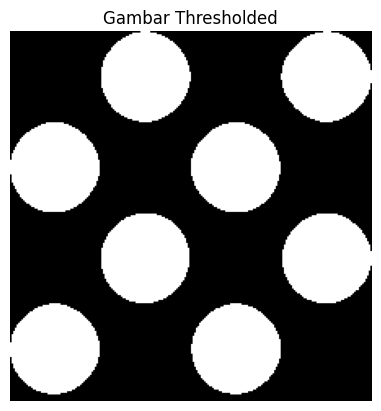

In [18]:
# Menampilkan gambar thresholded
plt.imshow(thresh, cmap='gray')
plt.title('Gambar Thresholded')
plt.axis('off')
plt.show()


In [19]:
# MEMBUAT PENOMORAN UNTUK SETIAP OBJEK PADA GAMBAR
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Anda memiliki gambar thresholded di variabel `thresh`
# Pastikan ini adalah gambar biner hasil dari cv2.threshold dengan cv2.THRESH_BINARY_INV
# Mencari kontur pada gambar
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
# Menduplikat gambar thresholded untuk menggambar nomor pada objek
thresh_with_numbers = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)  # Ubah ke BGR untuk menampilkan teks berwarna

In [21]:
# Inisialisasi nomor objek
object_number = 1
# Menentukan batas luas minimum untuk dianggap sebagai objek
minimum_area = 100

In [22]:
# Iterasi melalui setiap kontur
for contour in contours:
    # Hitung luas kontur
    area = cv2.contourArea(contour)

    # Jika luas kontur lebih besar dari batas minimum
    if area > minimum_area:
        # Dapatkan koordinat pusat kontur
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # Tulis nomor pada objek dengan warna teks yang kontras
            cv2.putText(thresh_with_numbers, str(object_number), (cX - 10, cY + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            object_number += 1  # Tingkatkan nomor objek untuk objek berikutnya

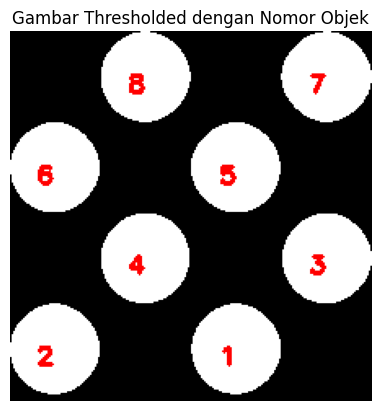

In [23]:
# Menampilkan gambar thresholded dengan nomor pada setiap objek
plt.imshow(cv2.cvtColor(thresh_with_numbers, cv2.COLOR_BGR2RGB))  # Menggunakan BGR ke RGB untuk matplotlib
plt.title('Gambar Thresholded dengan Nomor Objek')
plt.axis('off')
plt.show()
